Wrangling generically useful packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn import set_style
from time import sleep
import requests

set_style("whitegrid")

## Week 01 - Data cleaning + preprocessing 
Pulling data from the fencing database and storing as a dataframe

In [7]:
response = requests.get("https://fencingdatabase.com/api/clips/answers")

<Response [200]>

In [8]:
dir(response)

['__attrs__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_content',
 '_content_consumed',
 '_next',
 'apparent_encoding',
 'close',
 'connection',
 'content',
 'cookies',
 'elapsed',
 'encoding',
 'headers',
 'history',
 'is_permanent_redirect',
 'is_redirect',
 'iter_content',
 'iter_lines',
 'json',
 'links',
 'next',
 'ok',
 'raise_for_status',
 'raw',
 'reason',
 'request',
 'status_code',
 'text',
 'url']

Create dataframe and seperate each weapon

In [10]:
test = pd.json_normalize(response.json()['answers'])
test

,stats_id,weapon,initiated,strip_location,body_location,created_date
0,DimwittedThisCoypu,epee,fotl,fotr_half,front_arm,1591130715
1,KnobbySereneFreshwatereel,epee,fotl,middle,front_arm,1591144965
2,KnobbySereneFreshwatereel,epee,fotl,fotr_half,front_arm,1591156220
3,AnyVelvetyIvorybackedwoodswallow,epee,fotl,fotl_warning_box,torso,1591555506
4,EcstaticSilverHammerheadshark,epee,fotl,fotr_half,front_arm,1592342612
...,...,...,...,...,...,...
95,PeacefulDimBarb,epee,fotr,fotr_half,head,1595628885
96,FluidPointedIridescentshark,epee,fotr,middle,torso,1595628914
97,MilkyNeighboringGreathornedowl,epee,fotl,middle,torso,1595628941
98,NeglectedSpanishCavy,epee,fotr,fotl_half,front_arm,1595628973


Looks like the test worked, now to loop through the entire database to create a comprehensive dataframe.

In [45]:
loop = list(range(0, 7900, 100))
print(loop)

[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900, 5000, 5100, 5200, 5300, 5400, 5500, 5600, 5700, 5800, 5900, 6000, 6100, 6200, 6300, 6400, 6500, 6600, 6700, 6800, 6900, 7000, 7100, 7200, 7300, 7400, 7500, 7600, 7700, 7800]


In [55]:
fencing = []
numbers_worked = []
url = ("https://fencingdatabase.com/api/clips/answers/")
for number in loop:
    print('Asking Big Dog for ' + str(number)) # We've dubbed the admin of the database "Big Dog" for no particular reason
    try:
        response = requests.get("https://fencingdatabase.com/api/clips/answers/" + str(number))
        fencing.merge(pd.json_normalize(response.json()['answers']))
        numbers_worked.append(number)
    except:
        continue
    sleep(2)

Asking Big Dog for 0
Asking Big Dog for 100
Asking Big Dog for 200
Asking Big Dog for 300
Asking Big Dog for 400
Asking Big Dog for 500
Asking Big Dog for 600
Asking Big Dog for 700
Asking Big Dog for 800
Asking Big Dog for 900
Asking Big Dog for 1000
Asking Big Dog for 1100
Asking Big Dog for 1200
Asking Big Dog for 1300
Asking Big Dog for 1400
Asking Big Dog for 1500
Asking Big Dog for 1600
Asking Big Dog for 1700
Asking Big Dog for 1800
Asking Big Dog for 1900
Asking Big Dog for 2000
Asking Big Dog for 2100
Asking Big Dog for 2200
Asking Big Dog for 2300
Asking Big Dog for 2400
Asking Big Dog for 2500
Asking Big Dog for 2600
Asking Big Dog for 2700
Asking Big Dog for 2800
Asking Big Dog for 2900
Asking Big Dog for 3000
Asking Big Dog for 3100
Asking Big Dog for 3200
Asking Big Dog for 3300
Asking Big Dog for 3400
Asking Big Dog for 3500
Asking Big Dog for 3600
Asking Big Dog for 3700
Asking Big Dog for 3800
Asking Big Dog for 3900
Asking Big Dog for 4000
Asking Big Dog for 4100
Aski

In [59]:
total_df = pd.concat([fencing[0],fencing[1]])
for i in fencing[2:]:
    total_df = pd.concat([total_df,i])

In [61]:
total_df.head()
total_df.to_csv("fencingdb_dump.csv")

In [2]:
fencing = pd.read_csv("./data/fencingdb_dump.csv") #Checkpoint so we no longer need to scrape data

In [35]:
#Testing to see how the touch data is sorted
#Touch id is stored as stats_id in the dataframe
response = requests.get("https://fencingdatabase.com/api/clips/DimwittedThisCoypu")
touch = pd.json_normalize(response.json())
touches = touch.iloc[0:0] #Decided to make a new dataframe to fill in later with all the relevant columns
touches


,gfycat_gfy_id,tournament_id,weapon,gender,fotl_name,fotr_name,left_score,right_score,touch,download_url


In [37]:
# Now we need to loop through the ID of each touch and create a df that contains those info
id = list(fencing['stats_id'])
url = ("https://fencingdatabase.com/api/clips/")
for i in id:
    print('Asking Big Dog for ' + str(i)) # We've dubbed the admin of the database "Big Dog" for no particular reason
    try:
        response = requests.get("https://fencingdatabase.com/api/clips/" + i)
        touches = pd.concat([touches, pd.json_normalize(response.json())])
    except:
        continue
    sleep(1)

Asking Big Dog for DimwittedThisCoypu
Asking Big Dog for KnobbySereneFreshwatereel
Asking Big Dog for KnobbySereneFreshwatereel
Asking Big Dog for AnyVelvetyIvorybackedwoodswallow
Asking Big Dog for EcstaticSilverHammerheadshark
Asking Big Dog for SpotlessBoldBarnswallow
Asking Big Dog for ThankfulUnsteadyCockerspaniel
Asking Big Dog for PeskyOffbeatAldabratortoise
Asking Big Dog for ReasonableNippyAoudad
Asking Big Dog for HiddenKnobbyKoodoo
Asking Big Dog for InsecureRealBadger
Asking Big Dog for SnoopyUncommonAnophelesmosquito
Asking Big Dog for AppropriateOldfashionedEstuarinecrocodile
Asking Big Dog for IllShockedBasenji
Asking Big Dog for DimwittedGreatHarvestmouse
Asking Big Dog for HandsomeDopeyHound
Asking Big Dog for OpulentMadIbizanhound
Asking Big Dog for IdolizedUnpleasantLadybird
Asking Big Dog for AbleIdealisticIndianringneckparakeet
Asking Big Dog for DefinitiveAnimatedAssassinbug
Asking Big Dog for InformalRealisticIbadanmalimbe
Asking Big Dog for HelplessWhoppingCroco

In [39]:
touches.to_csv('./data/touches')

In [ ]:
#Combine the touches and fencing dataframes to create a comprehensive frame


In [25]:
#Split all the weapons because they can't really be analyzed together
epee = fencing[fencing['weapon'] == "epee"] # seperate the epee values
epee.to_csv("./data/epee.csv") # then save to csv
saber = fencing[fencing['weapon'] == "sabre"] # seperate the saber values
saber.to_csv("./data/saber.csv")
foil = fencing[fencing['weapon'] == "foil"] # seperate the foil values
saber.to_csv("./data/foil.csv")

In [27]:
epee['gfycat_gfy_id'] = epee['stats_id']
print(epee)

C:\Users\Kow\AppData\Local\Temp\ipykernel_11356\4093042351.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  epee['gfycat_gfy_id'] = epee['stats_id']


## 02 - Exploratory data analysis + visualizations 

<Axes: xlabel='body_location'>

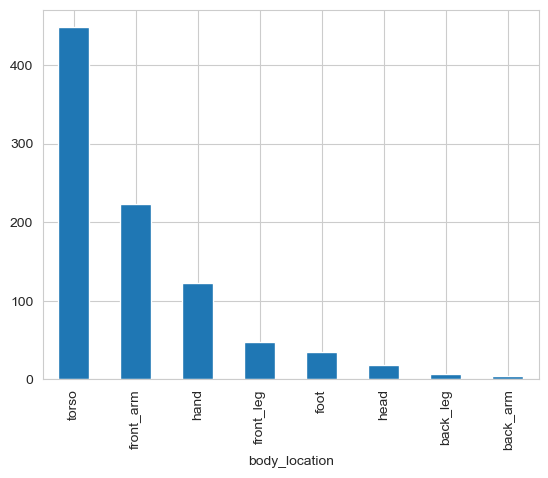

In [8]:
epee["body_location"].value_counts().plot(kind="bar")

<Axes: xlabel='body_location'>

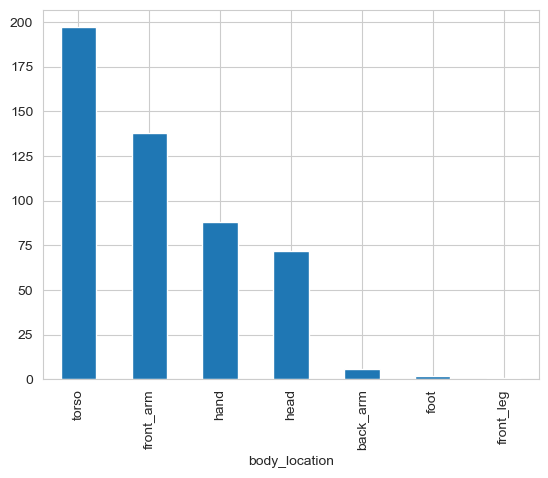

In [9]:
saber["body_location"].value_counts().plot(kind="bar")

<Axes: xlabel='body_location'>

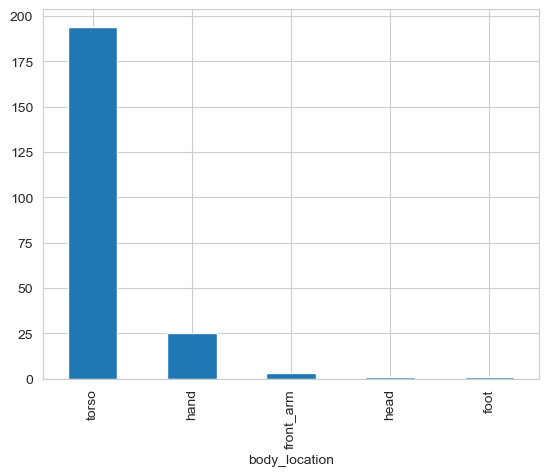

In [7]:
foil["body_location"].value_counts().plot(kind="bar")

Interesting that foil has any values other than those that score.

<Axes: xlabel='strip_location'>

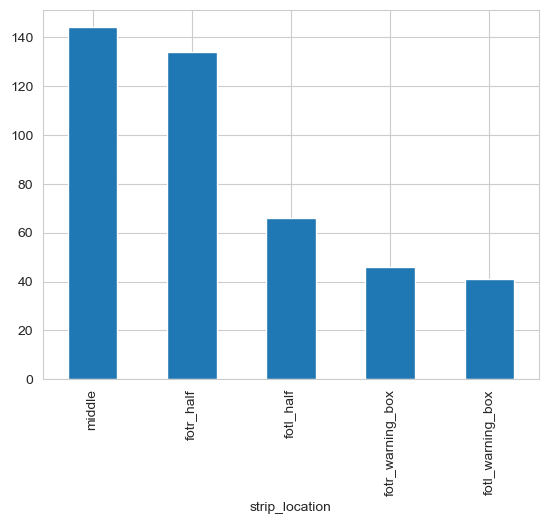

In [10]:
epee_fotl = epee[epee['initiated'] == 'fotl']
epee_fotl['strip_location'].value_counts().plot(kind='bar')

<Axes: xlabel='strip_location'>

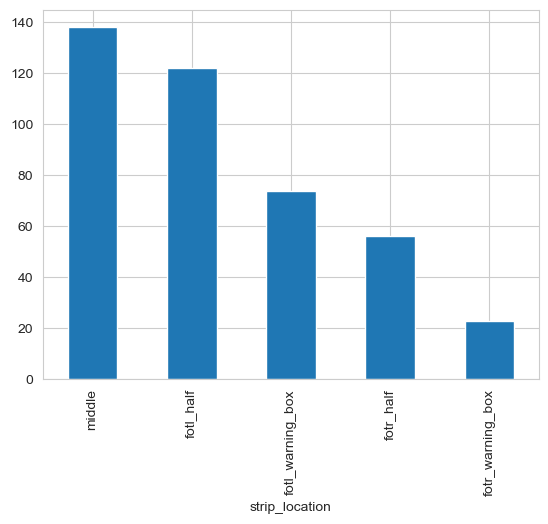

In [11]:
epee_fotr = epee[epee['initiated'] == 'fotr']
epee_fotr['strip_location'].value_counts().plot(kind='bar')

<Axes: xlabel='strip_location'>

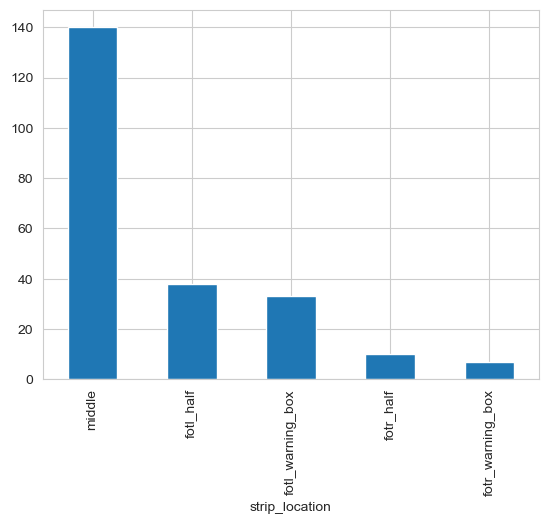

In [12]:
saber_fotr = saber[saber['initiated'] == 'fotr']
saber_fotr['strip_location'].value_counts().plot(kind='bar')


<Axes: xlabel='strip_location'>

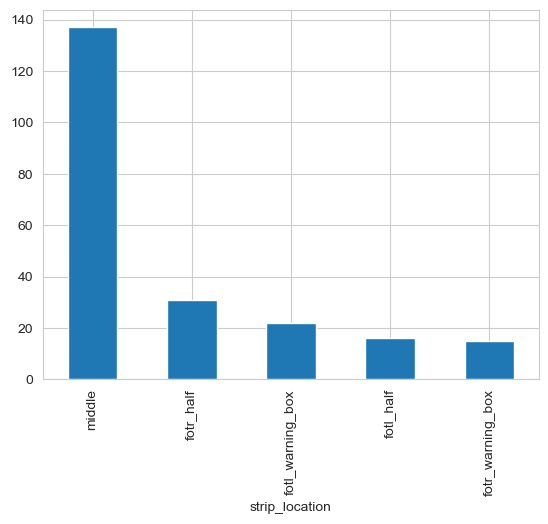

In [13]:
saber_fotl = saber[saber['initiated'] == 'fotl']
saber_fotl['strip_location'].value_counts().plot(kind='bar')